<a href="https://colab.research.google.com/github/vijayakuruba/IFT6758---NLP-and-CV/blob/main/IFT_6758_NLP_CV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1> IFT-6758 : Data Science  </h1></center>
<center><h2> Fall - 2020 </h2></center> 
<center><h3> Homework - 3</h3></center> 



[Notebook](https://colab.research.google.com/drive/1CKUlvdEa1bJLS2_P7UeaPUWSZ_ZDUDSH) due December 21, 2020 at [23.59 EST](https://www.worldtimebuddy.com/?qm=1&lid=6077243&h=6077243&date=2020-11-06&sln=23-24) as **PDF** on [Gradescope](https://www.gradescope.com/courses/179325/assignments/773268)

#**Choose ANY 2 of the 3 questions for answering.**


In [ ]:
#@title Imports (Run this cell first) { run: "auto" }
plotting_library = "matplotlib"
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns

# Uncomment this line below if using seaborn
#sns.set() 

%matplotlib inline

import random

import nltk
nltk.download('punkt')
nltk.download('stopwords')

path = 'https://raw.githubusercontent.com/Jhelum-Ch/DataScience_IFT6758/gh-pages/media/{}'

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# Qn 1 : Natural Language Processing

**15 points** = $(3 + 4 + 2 + 4 + 2)$                


In this section, you will try to implement functions to obtain the SVD embeddings of words from a text corpus. You will then compare it with Word2Vec.

In [ ]:
!wget "https://raw.githubusercontent.com/Jhelum-Ch/DataScience_IFT6758/gh-pages/media/train.txt"
!wget "https://raw.githubusercontent.com/Jhelum-Ch/DataScience_IFT6758/gh-pages/media/test.txt"

--2020-12-23 09:43:39--  https://raw.githubusercontent.com/Jhelum-Ch/DataScience_IFT6758/gh-pages/media/train.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 172996 (169K) [text/plain]
Saving to: ‘train.txt’

train.txt           100%[===================>] 168.94K  --.-KB/s    in 0.02s   

2020-12-23 09:43:39 (10.0 MB/s) - ‘train.txt’ saved [172996/172996]

--2020-12-23 09:43:39--  https://raw.githubusercontent.com/Jhelum-Ch/DataScience_IFT6758/gh-pages/media/test.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 31822 (31K) [text/plai

Read lines from text file

In [ ]:
def read_text_and_labels(file_name):
  file = open(file_name)
  lines = file.read().splitlines()
  return [tuple(x.split("\t")) for x in lines]

In [ ]:
train_data = read_text_and_labels('train.txt')
test_data = read_text_and_labels('test.txt')

Tokenization


In [ ]:
from nltk.tokenize import word_tokenize

def tokenize(data):
  return [word_tokenize(item[0].lower()) for item in data]

Classification Labels extraction

In [ ]:
def extract_labels(data):
  return [item[-1] for item in data]

Normalization

In [ ]:

from nltk.corpus import stopwords
import string

from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer('english')

stopwords_english = stopwords.words('english')

In [ ]:
def normalize(tokens):
  normalized_tokens = []
  for token_list,label in tokens:
    normalized = [stemmer.stem(word) for word in token_list if word not in stopwords_english and word not in string.punctuation]
    normalized_tokens.append((normalized,label))
  return normalized_tokens

In [ ]:
train = list(zip(tokenize(train_data),extract_labels(train_data)))
test = list(zip(tokenize(test_data),extract_labels(test_data)))

In [ ]:
X_train_tokens_processed = normalize(train)
X_test_tokens_processed = normalize(test)

In [ ]:
from nltk.probability import FreqDist

all_word_list = []
for sentences in X_train_tokens_processed:
    for token in sentences[0]:
        all_word_list.append(token)

fdist = FreqDist(all_word_list)
fdist.most_common(10)

[("n't", 233),
 ("'s", 216),
 ('good', 186),
 ('movi', 182),
 ('great', 170),
 ('film', 164),
 ('phone', 149),
 ('one', 124),
 ('work', 123),
 ('time', 115)]

###(a) Write a function that returns the word-document matrix based on the normalized tokens and any other parameters you would require. Notte that each data sample in the dataset can be considered as a document.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import TruncatedSVD

def dummy(doc):
    return doc
cv = CountVectorizer(tokenizer=dummy,preprocessor=dummy,)  

svd_model = TruncatedSVD(n_components=300, n_iter=100, random_state=122)

In [ ]:
def make_word_doc_matrix(data,tr):

    if tr==True:
       word_doc_matrix = cv.fit_transform(data)
    else:  
       word_doc_matrix = cv.transform(data) 
    #word_doc_matrix = pd.DataFrame(X.toarray(), columns=cv.get_feature_names())
  
    return word_doc_matrix

###(b) Write a function that transforms the review dataset into a dense embedding by representing each review with a dense vector extracted from SVD where dimension = 300. 

In [ ]:
def svd_embedding(data,svd_model,tr):

    doc_matrix=make_word_doc_matrix(data,tr)

    if tr==True:
       svd_embedding_data=svd_model.fit_transform(doc_matrix) #YOUR SOLUTION
    else:
       svd_embedding_data=svd_model.transform(doc_matrix)  # Call make_word_doc_matrix(data)
    return svd_embedding_data

###(c) Train a Linear SVC model on the dataset using these SVD document embedding representations and report the accuracy on the test-set. 

### Just add code to compute `svd_train_set` and `svd_test_set` by calling relevant functions and data in the cell below. Then run the following cell.

In [ ]:

dftrain=pd.DataFrame(X_train_tokens_processed)
dftrain.columns =['Name', 'label']

dftest=pd.DataFrame(X_test_tokens_processed)
dftest.columns =['Name', 'label'] 

s_train=svd_embedding(dftrain['Name'],svd_model,True)
s_test=svd_embedding(dftest['Name'],svd_model,False)

svd_train_set_X= pd.DataFrame(s_train)
svd_train_set_y=dftrain['label']

svd_test_set_X= pd.DataFrame(s_test)
svd_test_set_y=dftest['label']




Linear SVC has given 76.45% prediction on test data using the SVD document Embeddings

In [ ]:
from sklearn.svm import LinearSVC

classifier = LinearSVC(random_state=0, tol=1e-5)

classifier.fit(svd_train_set_X,svd_train_set_y)

accuracy = classifier.score(svd_test_set_X,svd_test_set_y)

print(accuracy)

0.7644710578842315


The cell below downloads a minimal pretrained word embeddings model from Google News dataset. The model includes embeddings for 100,000 words and phrases. (It will take a while)

In [ ]:
#Uncomment next line if running locally and not on colab
#!pip install gdown

!gdown https://drive.google.com/uc?id=1kaQdlksJ9jcJJ-q5R3UVjFNb02dYHZVs

Downloading...
From: https://drive.google.com/uc?id=1kaQdlksJ9jcJJ-q5R3UVjFNb02dYHZVs
To: /content/news-word2vec-100k.bin
347MB [00:03, 97.7MB/s]


The model is loaded using gensim:

In [ ]:
import gensim.models

model = gensim.models.KeyedVectors.load_word2vec_format('news-word2vec-100k.bin')

Example of getting the word vector of a word

In [ ]:
# Example of getting the Word2Vec

model.get_vector('happy')

Getting (top) similar words from the model. We see that the figures indicate thje 'similarity score' or dot product of different word vectors.

In [ ]:
model.similar_by_word('happy')

[('glad', 0.7408890128135681),
 ('pleased', 0.6632171273231506),
 ('ecstatic', 0.6626912355422974),
 ('overjoyed', 0.6599286794662476),
 ('thrilled', 0.6514049768447876),
 ('satisfied', 0.6437950134277344),
 ('proud', 0.636042058467865),
 ('delighted', 0.627237856388092),
 ('disappointed', 0.6269949674606323),
 ('excited', 0.6247666478157043)]

In [ ]:
model.vocab

In [ ]:
model.wv.index2entity

In [ ]:
model.wv.similarity('good','great')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


0.72915095

In [ ]:
model.wv.similarity('love','like')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


0.36713877

In [ ]:
model.wv.similarity('dead','live')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


0.21185444

In [ ]:
model.wv.similarity('worst','bad')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


0.43674564

### (d) Identify **FOUR interesting pairs of words** which exist both in the vocabulary of the SVD word embeddings and the Word2Vec embeddings that we have here. Compute the similarity score of the pairs of words in each case (in their respective embedding spaces). 

###Reason about which of these two embeddings you would use for a sentiment classification task.

In [ ]:
def dummy(doc):
    return doc

cv = CountVectorizer(tokenizer=dummy,preprocessor=dummy,max_features=1000)  # I have redone countvectorizer with only top 1000 fearures
X = cv.fit_transform(dftrain['Name']).toarray()

#X=make_word_doc_matrix(dftrain['Name'],True)
X[X > 0] = 1


NameError: ignored

In [ ]:

word_doc_matrix = pd.DataFrame(X.toarray(), columns=cv.get_feature_names()) # wor documnet matrix with 1000*300

word_word_mat = np.dot(word_doc_matrix.T, word_doc_matrix) # To obtain word word matrix
np.fill_diagonal(word_word_mat, 0)

#svd_model = TruncatedSVD(n_components=300,algorithm='randomized', n_iter=100, random_state=122)
svd_model.fit(word_word_mat) #fit word word matrix


word_word_matrix = pd.DataFrame(word_word_mat, columns=cv.get_feature_names(),index=cv.get_feature_names()) #converted word word matrix to dataframe
Wordvector = svd_model.transform(word_word_mat) # Transform word word matrix




In [ ]:
svd_model.explained_variance_ratio_.sum()

0.952256087271138

   FEATURE  Feat_IMP_value
0      n't        0.087495
1       's        0.076308
2     good        0.070316
3     movi        0.066720
4    great        0.065122
..     ...             ...
95    mani        0.010388
96   enjoy        0.009988
97   minut        0.009988
98    life        0.009988
99   scene        0.009988

[100 rows x 2 columns]


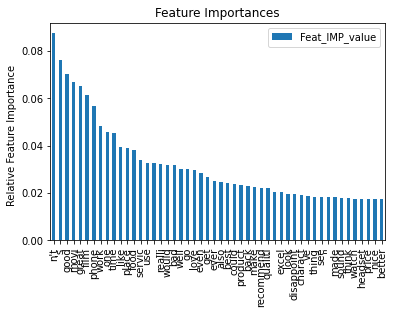

In [ ]:
import pandas as pd


word=cv.get_feature_names()

TFIDF_mean = np.mean(X, axis = 0)
TFIDF_mean = np.array(TFIDF_mean)[0].tolist()
    
#Feature_importance=top_feats(TFIDF_mean ,Word, Imp_Feat)

topn_ids = np.argsort(TFIDF_mean)[::-1][:1000]
names = np.array(word)
#print(names[topn_ids])
top_feats = [(word[i], TFIDF_mean[i]) for i in topn_ids]
df_feat = pd.DataFrame(top_feats,index=names[topn_ids])
df_feat.columns = ['FEATURE', 'Feat_IMP_value']


Feature_importance=df_feat
df_feat[:50].plot.bar(y='Feat_IMP_value',title='Feature Importances', rot=90)
plt.ylabel('Relative Feature Importance  ')
New_FI_index=Feature_importance.reset_index()
del New_FI_index['index']
print(New_FI_index.head(100))

In [ ]:
Wordvec=pd.DataFrame(Wordvector,index=cv.get_feature_names())
Wordvec

0          1          2    ...       297       298       299
''     23.952043  17.089065  -7.838059  ... -0.138665 -0.056555  0.087882
'd      8.710298  -0.719868   1.454814  ...  0.061081 -0.172690  0.177787
'm     11.876048  -2.754761   2.669518  ... -0.051514  0.073139  0.210627
's     70.428974   9.315526 -10.823669  ... -0.065510 -0.061385  0.042352
--      7.797845   1.613734  -2.991583  ...  0.202648  0.199968 -0.290479
...          ...        ...        ...  ...       ...       ...       ...
yet     5.042859   0.853207  -1.064480  ... -0.276211  0.474681  0.056750
young   1.468733   0.766627  -0.590013  ... -0.062152 -0.034476 -0.084848
yummi   0.259508  -0.076702   0.125097  ...  0.087493 -0.025581  0.015440
zero    1.230262  -0.404577   0.504684  ... -0.084286  0.058046 -0.107367
       2.372188   0.613916  -0.869728  ... -0.043220  0.121759  0.231134

[1000 rows x 300 columns]

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
cos1=cosine_similarity([Wordvec.loc[ 'good' , : ]],[Wordvec.loc[ 'great' , : ]])
cos2=cosine_similarity([Wordvec.loc[ 'like' , : ]],[Wordvec.loc[ 'enjoy' , : ]])
cos3=cosine_similarity([Wordvec.loc[ 'worst' , : ]],[Wordvec.loc[ 'bad' , : ]])
cos4=cosine_similarity([Wordvec.loc[ 'dead' , : ]],[Wordvec.loc[ 'live' , : ]])

print("Similarity in SVD is", cos1, "Word2vec is", model.wv.similarity('good','great'))
print("Similarity in SVD is", cos2, "Word2vec is", model.wv.similarity('enjoy','like'))
print("Similarity in SVD is", cos3, "Word2vec is", model.wv.similarity('worst','bad'))
print("Similarity in SVD is", cos4, "Word2vec is", model.wv.similarity('dead','live'))


Similarity in SVD is [[0.6828293]] Word2vec is 0.72915095
Similarity in SVD is [[0.42737333]] Word2vec is 0.30146733
Similarity in SVD is [[0.31511307]] Word2vec is 0.43674564
Similarity in SVD is [[0.19646207]] Word2vec is 0.21185444


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  # Remove the CWD from sys.path while we load stuff.


# Clustered and visualised just for reference

In [ ]:
from wordcloud import WordCloud, STOPWORDS 

def word_cloud_form(text_value):
    comment_words = ' '
    stopwords = set(STOPWORDS) 
    for words in text_value: 
        comment_words =comment_words + words + ' '


   
    wordcloud = WordCloud(width = 800, height = 800, 
                    background_color ='black', 
                    stopwords = stopwords, 
                    min_font_size = 10).generate(comment_words) 

    # plot the WordCloud image                        
    plt.figure(figsize = (8, 8), facecolor='y', edgecolor='w') 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 

    plt.show()

In [ ]:
cluster_range=list(range(2,20))

In [ ]:
from tqdm import tqdm

def Optimal_cluster_kmeans(vectorization_output):
    
    optimal_score = []
    
    for i in tqdm(range(len(cluster_range))):
        
        kmeans = KMeans(n_clusters = cluster_range[i], n_jobs = -1).fit(vectorization_output)
        optimal_score.append(kmeans.inertia_) 
        
    global Optimal_cluster
    
    Optimal_cluster = np.argmin(optimal_score) + 2 # As argmin return the index of minimum loss. 
    print ("The optimal number of clusters == ", Optimal_cluster)
    print ("The loss for optimal cluster is ==  ", min(optimal_score))
    
    #plot the graph
    
    fig4 = plt.figure( facecolor='c', edgecolor='k')
    fig4.suptitle('Optimal Cluster using Elbow method ', fontsize=12)       
    plt.plot(cluster_range, optimal_score,'m*',linestyle='dashed')
    plt.xlabel("Number of clusters")
    plt.ylabel("Squared Loss")
    xy = (Optimal_cluster, min(optimal_score))
    plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
    plt.grid()
    plt.show()

100%|██████████| 18/18 [00:09<00:00,  1.81it/s]


The optimal number of clusters ==  19
The loss for optimal cluster is ==   70506.02482647295


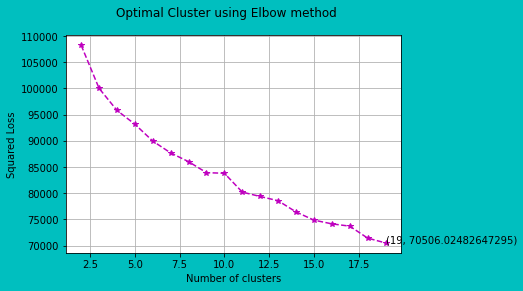

In [ ]:
from sklearn.cluster import KMeans
Optimal_cluster_kmeans(Wordvector)

In [ ]:
def cosine_sim_mat(Wordvector):
    
    Cos_sim_mat=cosine_similarity(Wordvector[0:(Wordvector.shape[0])], Wordvector)
    plt.matshow(Cos_sim_mat)
    plt.show()
    #print(len(Cos_sim_mat))
    #print(Cos_sim_mat)
  
    global mat
    for p in range(len( Cos_sim_mat)):

        temp_sim_words=[]
        mat=[]
        for j in range(len( Cos_sim_mat[p])):

            if  Cos_sim_mat[p][j] >= 0.6:
                temp_sim_words.append( Cos_sim_mat[p][j])
            mat.append( Wordvector[j])
    return mat       
      

In [ ]:
def clusters_KM( Optimal_cluster,qqq,FINAMES):
    
    print("$__$__" * 10)

    model = KMeans(n_clusters = Optimal_cluster, n_jobs = -1)
    model.fit(qqq)
    print(model)
     
  
    FI_index = [i for i in range(len(qqq))]
    model_FI = dict()
    for (key, value) in zip(model.labels_, FI_index):
        model_FI.setdefault(key,[])
        model_FI[key].append(value)

    # List of clusters
    global clusters
    clusters = []
    labels = sorted(list(set(model.labels_)))

    for i in labels:
        FI_temp = []
        for idx in sorted(model_FI [i]):
            FI_temp.append(FINAMES[idx])
        clusters.append(FI_temp)

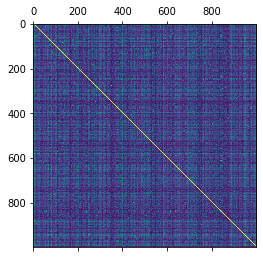

$__$__$__$__$__$__$__$__$__$__$__$__$__$__$__$__$__$__$__$__
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=19, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)


In [ ]:
mat=cosine_sim_mat(Wordvector)
clusters_KM( Optimal_cluster, mat,New_FI_index['FEATURE'])

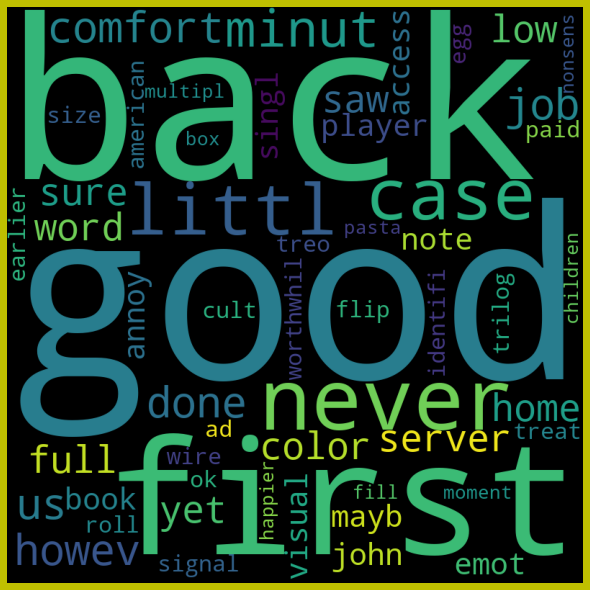

In [ ]:
word_cloud_form(clusters[0])

###(e) Identify any 4 reviews **correctly** classified as positive (with respect to sentiment analysis) by the `classifier` in (c) with the SVD *document embeddings* from the `test_data`. In each of these reviews highlight 1 word *in each case* that you think should have lead to a positive prediction. Verify if these 4 words have any similarity relationships as revealed by their SVD *word embedding* representations.  

You can use the following code to determine which features are most effective in sentiment analysis.

In [ ]:
labels_pred=classifier.predict(svd_test_set_X)

from sklearn.metrics import confusion_matrix
cm_nb = confusion_matrix(svd_test_set_y, labels_pred)
cm_nb
 


array([[  0,   1,   0],
       [  0, 191,  47],
       [  0,  70, 192]])

In [ ]:
# intialise data of lists. 
data = {'Name':dftest['Name'], 
        'label_test':svd_test_set_y,
        'label_pred':labels_pred} 
  
# Create DataFrame 
df = pd.DataFrame(data) 



In [ ]:
correct_pred=df[(df['label_test'] == '1') & (df['label_pred']== '1')]
correct_pred

Name label_test label_pred
1                                [iam, pleas, purchas]          1          1
3                                     [get, job, done]          1          1
4                                       [great, audio]          1          1
7                  [ve, bluetooth, week, realli, like]          1          1
10             [accompani, softwar, almost, brilliant]          1          1
..                                                 ...        ...        ...
484                     [great, film, great, director]          1          1
485  [movi, edg, seat, made, somewhat, afraid, go, ...          1          1
486                        [music, film, realli, nice]          1          1
488                                        [brilliant]          1          1
492  [rock, world, certain, must, see, anyon, socia...          1          1

[192 rows x 3 columns]

I picked 4 words from positive reviews which I felt are positive because of these words.
charm, recommend,love,nice

As such I have not seen Very scoring between these words. Could be because of the dataset quality. Also the embeddings might not have captured effectively.

In [ ]:
print("Similarity in SVD for words love and nice is", cosine_similarity([Wordvec.loc[ 'love' , : ]],[Wordvec.loc[ 'nice' , : ]]))
print("Similarity in SVD for words love and charm is", cosine_similarity([Wordvec.loc[ 'love' , : ]],[Wordvec.loc[ 'charm' , : ]]))
print("Similarity in SVD for words love and recommend is", cosine_similarity([Wordvec.loc[ 'love' , : ]],[Wordvec.loc[ 'recommend' , : ]]))
print("Similarity in SVD for words charm and recommend is", cosine_similarity([Wordvec.loc[ 'charm' , : ]],[Wordvec.loc[ 'recommend' , : ]]))
print("Similarity in SVD for words recommend and nice is", cosine_similarity([Wordvec.loc[ 'recommend' , : ]],[Wordvec.loc[ 'nice' , : ]]))
print("Similarity in SVD for words charm and nice is", cosine_similarity([Wordvec.loc[ 'charm' , : ]],[Wordvec.loc[ 'nice' , : ]]))

Similarity in SVD for words love and nice is [[0.41705266]]
Similarity in SVD for words love and charm is [[0.36787778]]
Similarity in SVD for words love and recommend is [[0.37138895]]
Similarity in SVD for words charm and recommend is [[0.18506739]]
Similarity in SVD for words recommend and nice is [[0.21209904]]
Similarity in SVD for words charm and nice is [[0.1596317]]


# Qn 2 : Computer Vision 

**15 points** = $(1.5 + 1 + 1.5 + 1.5 + 1 + 1.5 + 4 + 3)$                

In this section, you will add lines of code to transform a sample image using different filters and see their impact on the prediction by a pretrained image recognition model.



Import of `cv2`  

In [ ]:
import cv2

import os
import sys

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import ipywidgets as widgets
from ipywidgets import interact, interact_manual

Download the image file `cat.jpg`

In [ ]:
!wget 'https://i.ibb.co/SB0c2DW/cat.jpg'

--2020-12-24 20:01:16--  https://i.ibb.co/SB0c2DW/cat.jpg
Resolving i.ibb.co (i.ibb.co)... 145.239.131.51, 145.239.131.55, 145.239.131.60
Connecting to i.ibb.co (i.ibb.co)|145.239.131.51|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72646 (71K) [image/jpeg]
Saving to: ‘cat.jpg’

cat.jpg             100%[===================>]  70.94K  --.-KB/s    in 0.03s   

2020-12-24 20:01:17 (2.35 MB/s) - ‘cat.jpg’ saved [72646/72646]



###(a) Read the RGB image and store it in a variable `raw_image`. Resize `raw_image` to have dimensions `224 x 224` with the same RGB channels and store this in the same variable `image` and **display** it. 

Before Resize:  (427, 640)
After Resize :  (224, 224)


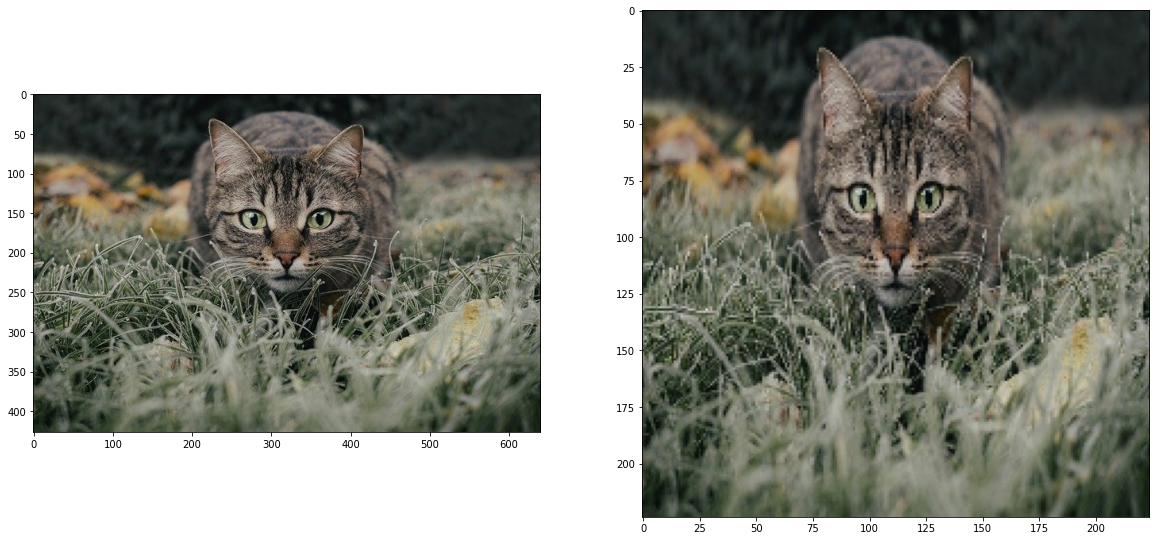

In [ ]:
raw_image = cv2.imread('cat.jpg',cv2.IMREAD_UNCHANGED)

img = cv2.cvtColor(raw_image, cv2.COLOR_BGR2RGB) # converted default CV BGR to RGB

print('Before Resize: ',img.shape[:2])

IMG_WIDTH = 224  #image size after resizing
IMG_HEIGHT = 224

image = cv2.resize(img,(IMG_WIDTH,IMG_HEIGHT)) #default Interpolation 
#re2_img = cv2.resize(img,(IMG_WIDTH,IMG_HEIGHT),interpolation=cv2.INTER_AREA) # tried other Interpolation but got max probability with default 
print('After Resize : ',image.shape[:2])
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.imshow(img)
plt.subplot(1,2,2)
plt.imshow(image)
plt.show()


###(b) Convert the `image` into a grayscale image, store it in the variable `grayscale` and display it.

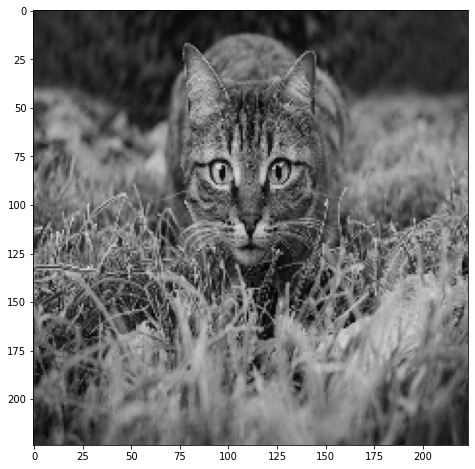

In [ ]:
grayscale = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(8,8))
plt.imshow(grayscale, cmap='gray')
plt.show()

###(c)  image in RGB and generate three images (`r_inverted`, `g_inverted`, `b_inverted`) where in each one the colors of one channel is inverted. **Display** each of the inverted images.

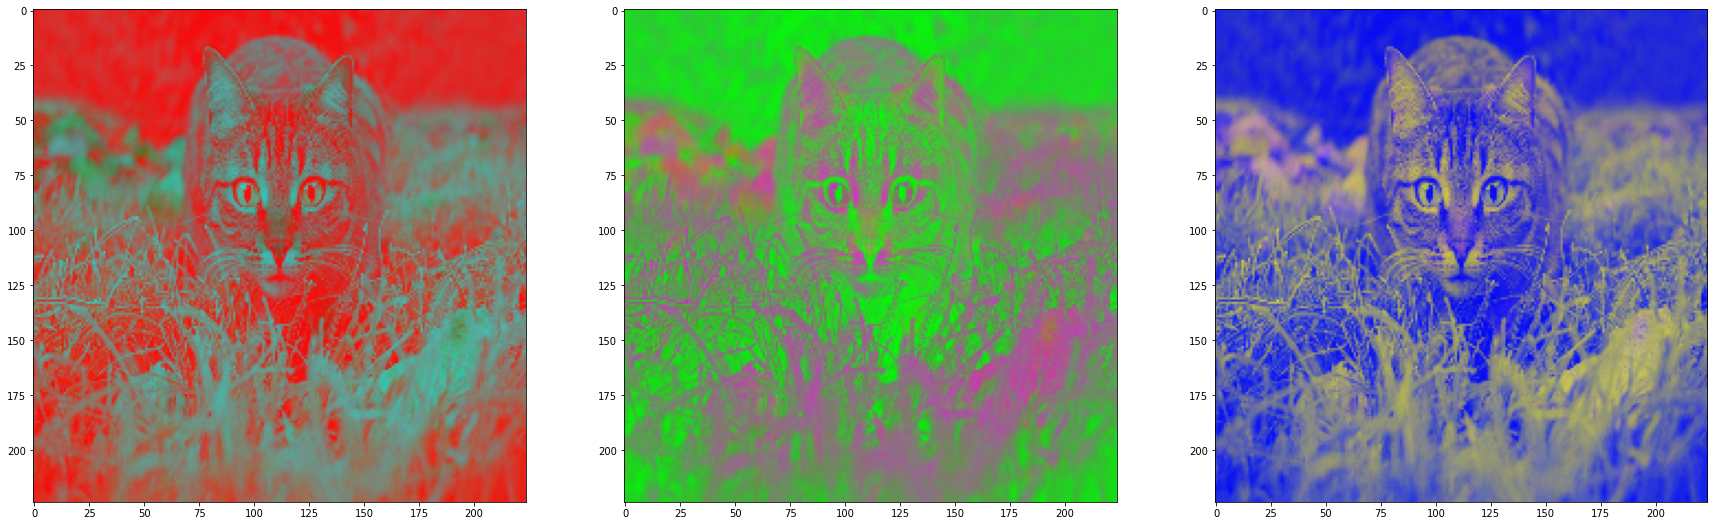

In [ ]:

r = cv2.bitwise_not(image[:,:,0]) #Inverted Red channel
g = cv2.bitwise_not(image[:,:,1]) #Inverted Green channel
b = cv2.bitwise_not(image[:,:,2]) #Inverted Blue channel

r_inverted=cv2.merge((r,image[:,:,1],image[:,:,2])) # combined inverted Red channel with other two channels
g_inverted=cv2.merge((image[:,:,0],g,image[:,:,2])) # combined inverted Green channel with other two channels
b_inverted=cv2.merge((image[:,:,0],image[:,:,1],b)) # combined inverted Blue channel with other two channels


plt.figure(figsize=(30,30))
plt.subplot(1,3,1)
plt.imshow(r_inverted)
plt.subplot(1,3,2)
plt.imshow(g_inverted)
plt.subplot(1,3,3)
plt.imshow(b_inverted)
plt.show()



###(d) Implement a filter that makes the image 50% lighter and the filter that makes it 50% darker. Make sure to run the cell below to store the results of applying these filters on `image`. 

###**Display** the resulting images.

In [ ]:
def lightening_filter(image):
     
    lighter_image=np.zeros(image.shape,image.dtype)
    for l in range(image.shape[0]):
        for m in range(image.shape[1]):
            for n in range(image.shape[2]):
# Basically lighter image is X+128 , here 50% of pixels values are added to original pixels and capped to [0,255]
                lighter_image[l,m,n] = np.clip(0.5*image[l,m,n] + image[l,m,n], 0, 255)
    return lighter_image
    
def darkening_filter(image):
    
    darker_image=np.zeros(image.shape,image.dtype)
    for l in range(image.shape[0]):
        for m in range(image.shape[1]):
            for n in range(image.shape[2]):
# Basically lighter image is X-128 , here 50% of pixels values are retained by substracting from original pixels and capped to [0,255]
                darker_image[l,m,n] = np.clip(1.5*image[l,m,n] - image[l,m,n], 0, 255) # cap to [0,255]
    return darker_image

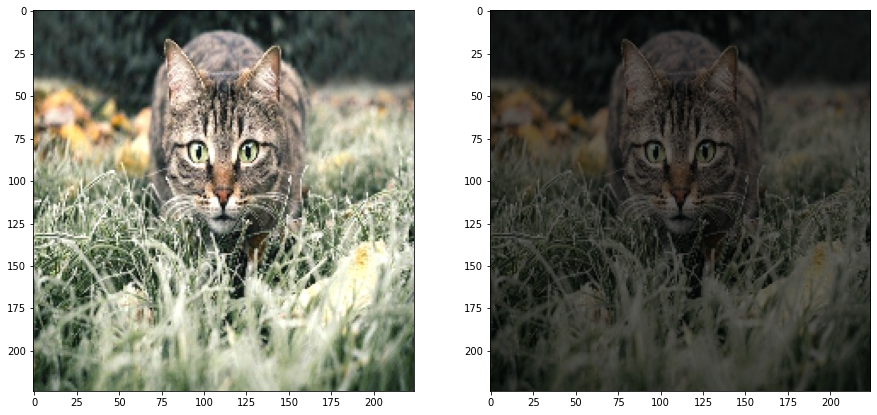

In [ ]:
lighter_image = lightening_filter(image)
darker_image = darkening_filter(image)

plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.imshow(lighter_image)
plt.subplot(1,2,2)
plt.imshow(darker_image)
plt.show()

### (e) Implement a filter that transforms an image into its mirror image. Run the following cell to apply this filter on `image` and store it as `mirror_filter`. ###

###Apply this filter to the image and **display** the output by running the next cell.

In [ ]:
def mirror_filter(img):
    mirror_image = cv2.flip(img,1) # flipped along Y axis
    return mirror_image  


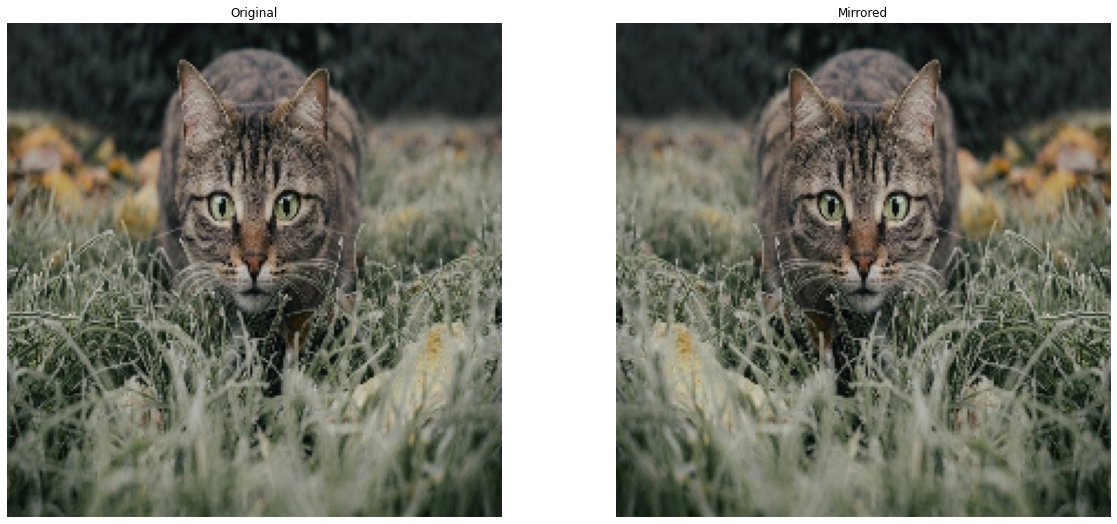

In [ ]:
mirror_image = mirror_filter(image)

fig = plt.figure(figsize=(20, 20))
ax1 = fig.add_subplot(2, 2, 1)
ax1.axis("off")
ax1.title.set_text('Original')
ax2 = fig.add_subplot(2, 2, 2)
ax2.axis("off")
ax2.title.set_text("Mirrored")
ax1.imshow(image)
ax2.imshow(mirror_image)

### (f) Write a function that applies a 3 x  3 mean filter on the image. Mean filter is a simple sliding window that replaces the center pixel value with the average of all pixel values in the window. Note that the border pixels remain unchanged.

### Apply this filter to the image and **display** the output by running the next cell.

In [ ]:
def mean_filter(image):
    
    m, n, p = image.shape  # Obtain number of rows and columns of the image   
    filter=3 #Kernel size

    # Convolve the 3X3 mask over the image  
    mean_filtered_image = image.copy()
  
    for k in range(3):
     for i in range(1,m-1): 
         for j in range(1,n-1): 
             temp = mean_filtered_image[i:i+3,j:j+3,k]
             mean_filtered_image[i, j, k]= np.mean(temp) 

    return mean_filtered_image

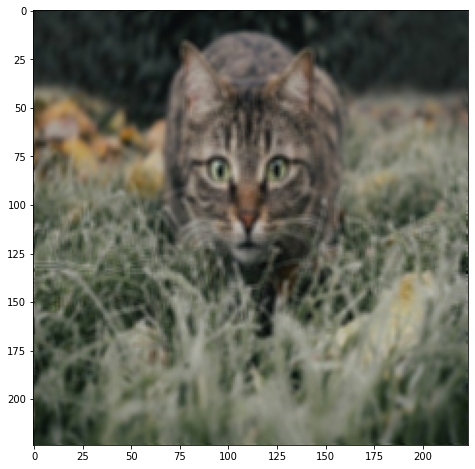

In [ ]:
mean_filtered_image = mean_filter(image)

plt.figure(figsize=(8,8))
plt.imshow(mean_filtered_image)

### (g) Here you are going to make predictions for the 9 images you generated in the previous parts. A Convolutional Neural Network model (VGG-16) pretrained on [ImageNet](http://image-net.org/) dataset has been loaded as `model`. The dataset has 1000 common natural image categories for prediction.

### Complete the steps to use these 9 sample images as test set and make predictions of categories.

In [ ]:
grayscale = cv2.cvtColor(grayscale,cv2.COLOR_GRAY2RGB) # Converting Gray Image to RGB image for VGG prediction

In [ ]:
test_set = [image, grayscale, r_inverted, g_inverted, b_inverted, mirror_image, lighter_image, darker_image, mean_filtered_image]

In [ ]:
test_set_names = ['image', 'grayscale', 'r_inverted', 'g_inverted', 'b_inverted', 'mirror_image', 'lighter_image', 'darker_image', 'mean_filtered_image']


In [ ]:
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array


# Loading the pretrained model with weights from training on ImageNet dataset
model = VGG16(weights='imagenet')

for i in range(0,len(test_set)):
  x = img_to_array(test_set[i]) 
  x = x.reshape((1, x.shape[0], x.shape[1], x.shape[2]))
  #[1] Preprocess the test_set images before using model for prediction 
  test = preprocess_input(x)
  #[2] Use the model to obtain the probabilities for all output classes
  yhat = model.predict(test)   
  label = decode_predictions(yhat)
#  [3]Decode the predicted class label with highest probability (top-1) and score to display them
  label_top = label[0][0]
  label = label_top[1]
  score=label_top[2]
  image_sample=test_set_names[i]
# [4] Print this for all 9 samples
  print('Predicted class [{}] : {} with {:.02f}% probability'.format(image_sample, label, score*100))


40960/35363 [==================================] - 0s 0us/step
Predicted class [image] : tiger_cat with 89.84% probability
Predicted class [grayscale] : lynx with 63.95% probability
Predicted class [r_inverted] : shower_curtain with 20.63% probability
Predicted class [g_inverted] : matchstick with 17.25% probability
Predicted class [b_inverted] : jellyfish with 79.32% probability
Predicted class [mirror_image] : tiger_cat with 86.87% probability
Predicted class [lighter_image] : tiger_cat with 95.28% probability
Predicted class [darker_image] : tiger_cat with 54.30% probability
Predicted class [mean_filtered_image] : tiger_cat with 71.91% probability


### (h) Based on the results you obtained in (g), what can you tell about the impact of the different filters that you implemented on the predictability of the image category by the model? Explain with some intuitions and observations.

In general, When we invert colours, we will convert all the pixel colours and brightness values of the image. It appears as if it was converted to a negative.  Each color is replaced by its complementary correspondent hues are replaced by complementary colours.
Inverting a particular channel, saturates the image with that color
so we loose the exact info from pixels.

red_inverted : when red channel is inverted it inverts pixels in red channel. Looking at the original image there are very minimum red pixels. that why when we inverted red channel all the image is red dominent. I felt there are folds and because of the red effect model could have perdicted as shower_curtain .

green_inverted: when green channel is inverted it inverts pixels in green channel.Looking at the original image majority of grass pixels are green. Light colours have become dark and vice versa. May be because of the dark brown colour effect model hasidentified as Matchstick. 

Blue_inverted: when blue channel is inverted it inverted pixels in blue channel.there are some blobs of smoothened region with water effect which might have classified as jelly fish. 

Mirror image: When we flip image its going to flip the pixlels.In this particular picture there is no big difference in pixels between left and right. Flipped Image is very similar to Original Image.Hence model has recognised as Tiger cat with close probablity as original image.

Grayscale image : Since there is no colour channels, the effect of colours doesnt considered for prediction. Gray scale has eliminated hue and saturation of the image while retaining the luminance. Based on the contour/features alone it might have predicted lynx (lynx and Tigercat looks pretty much similar) 

Image Smoothing techniques help us in reducing the noise in an image. Mean filter image has blurred the image. Image has blur effect and the pixels are replaced with mean value in Kernel. So this filters doesnt change the prediction but the probability is closer to original image.

Lighter Image: I have added 0.5*pixels (50%)  values to original image and capped to [0 255]. It has enhanced the features thats why the probablity of identifying as tiger cat has increased to 94.40% which is better than original image prediction probablity.

Darker Image: I have substracted image pixels from 1.5*pixels values to original image and capped to [0 255]. this filter has reduced the image contrast so the model could predict it as Tiger cat. Since Tiger cat and lynx belongs same family and looks similar the model predicted as lynx with 52.25% probability.

# Qn 3 : Graph ML 

**15 points** = $(1.5 + 1.5 + 1.5 + 2.5 + 2.5 + 2.5 + 3)$                



In this section, you will implement simple functions for obtaining basic graph node embeddings and finally you will observe the differences between them. 

**Please use only simple mathematical operations (numerical and linear algebra from relevant packages). Use of NetworkX or any other specialized graph library wil not be accepted.**

###(a) Write a function `random_adjacency_matrix(n,p)` which returns an adjacency matrix for a "random graph" with $n$ vertices where $p$ is the probability of having an edge between any pair of vertices.


In [ ]:
import itertools

def random_adjacency_matrix(n,p):#YOUR SOLUTION

    rand_adj_matrix = np.zeros((n,n))
    for i, j in itertools.combinations_with_replacement(list(range(n)), 2):
      if random.random() < p:
        rand_adj_matrix[i][j] = 1 #diagnol
        rand_adj_matrix[j][i] = 1  # undirected
        A=rand_adj_matrix
        #print(A)
    
    return A   

###(b) Write a function `transion_matrix(A)` which, given an adjacency matrix $A$, generates a transition matrix $T$ where probability of each edge (u,v) is calculated as $1/degree(u)$.


In [ ]:
def transition_matrix(A):
    degree = np.sum(A, axis=1)[:,np.newaxis]#sum of row values in A and broadcast as column
    trans_matrix=A / degree # dividing adjacency matrix with degree
    T=np.nan_to_num(trans_matrix) # replace nan with zero and inf with finite numbers
    return T

###(c) Write a function `one_hot_embedding(A)` which, given an adjacency matrix A, generates an embedding matrix H where each node is represented with a 1-hot vector.

In [ ]:
def one_hot_embedding(A):
    m,n=A.shape
    H=np.identity(m) #One hot embedding of nodes which is Identity matrix
    return H

###(d) Write a function `random_walk_embedding(A,T,H,w,l)` which, given an adjacency matrix $A$, the corresponding transition matrix $T$, and one-hot encoding matrix $H$, performs [random walks](https://en.wikipedia.org/wiki/Random_walk) on the graph from each node $w$ times with length of the walk equal to $l$ and generate an embedding matrix for each node based on the sum of 1-hot encodings of all nodes that are visited during the walks.


In [ ]:
def random_walk_embedding(A,T, H, w, l):
    #YOUR SOLUTION
    m = A.shape[0] #size of adj matrix
    R = np.zeros((m,m)) #initialise the random walk
    for node in range(m): #start at first node
      for i in range(w): #do w walks
        present_node = node
        for j in range(l): #visit l nodes or l length
          present_node = np.random.choice(m,p=T[present_node]) #select next node visited in function of the transition matrix
          R[node]=R[node] + H[present_node] #add onehot of visited node to get count
    return R

###(e) Write a function `k_hop_embedding(A,H,k)` which, given an adjacency matrix $A$, and one-hot node encoding matrix $H$, generates node embedding matrix $kH$ which represents each node as sum of 1-hot encodings of $k$-hop neighbors. 


In [ ]:
def k_hop_embedding(A, H, k):
    #YOUR SOLUTION
    m = A.shape[0] #size of adj matrix
    kH = np.zeros((m,m)) #initialise K hop matrix
    A_k = np.linalg.matrix_power(A,k) #A power k gives us the number of walks from node i to node j after k steps.
    for i in range(m): 
      for j in range(m):
        #if there is a walk with k-steps from i to j then j is a k-hop neighbor of i
        if A_k[i,j] > 0:
          kH[i] += H[j] #add onehot of k-hop neighbor to get count
    return kH

A function `most_similar_nodes(Z)` which, given an node embedding matrix, finds the most similar node for each node in the graph.

In [ ]:
def most_similar_nodes(Z):
    # Example : For 5 nodes [1,2,3,4,5], most_similar_node_list could be [5,3,2,1,2] indicating 
    # 1 -> 5, 2 -> 3, 3 -> 2, 4 -> 1, 5 -> 2
    similarity=Z@Z.T
    np.fill_diagonal(similarity,0)
    most_similar_node_list = similarity.argmax(1) 
    return most_similar_node_list

###(f) Generate a random graph where $n=20$, and $p=0.6$, and print the most similar nodes in the graph using the mebeddings obtained from :

###(Run the correct functions with the right arguments)

In [ ]:
#@title ⚠️  Random seed : Run this cell mandatorily before running your solution { display-mode: "form" }
# Do not change or remove


np.random.seed(42)
random.seed(42)

In [ ]:
# Generate the random graph 
A = random_adjacency_matrix(20,0.6)

(-0.8640256690560435,
 1.088763127097907,
 -0.8939810533834296,
 0.9778448908947035)

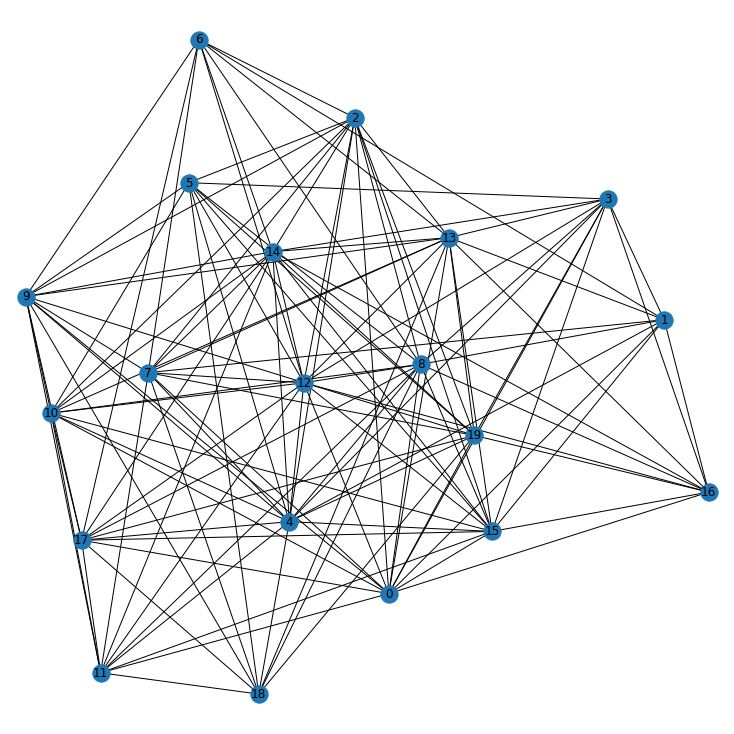

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

plt.figure(figsize=(10,10))
#Visualise Random graph A
G2 = nx.from_numpy_matrix(A)
nx.draw_kamada_kawai(G2,with_labels=True)
nx.draw
plt.axis('equal')

* `random_walk_embedding(l=4, w=10)`

In [ ]:
#inputs to random walk

T=transition_matrix(A) #probabilty
H=one_hot_embedding(A)
random_walk_emd=random_walk_embedding(A,T,H,w=10,l=4)
most_similar_nodes(random_walk_emd)

array([16,  9,  7, 11,  5,  8, 13, 14,  5,  1,  5, 15, 10,  6,  6,  7,  0,
        6,  6,  6])

* `k_hop_embedding(k=1)`

In [ ]:
#k_hop_1
k_hop_1=k_hop_embedding(A,H,k=1)
most_similar_nodes(k_hop_1)

array([ 4, 12,  9,  2,  0,  4,  0,  9, 12,  2,  2, 17, 14,  4,  0, 12,  3,
       11,  9,  9])

* `k_hop_embedding(k=2)`

In [ ]:
## k hop2
k_hop_2=k_hop_embedding(A,H,k=2)
most_similar_nodes(k_hop_2)

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

###(g) Justify why the most similar nodes obtained in each of the cases in (g) above are different using different node embeddings. Reason intutively about why the obtained 'most similar' nodes are actually similar in each case.  

Part1: 

In case of k-hop k=1, It is nothing but Adjacency based matrix node embeddings. If there is an edge between 2 nodes It will identify as similar node.Only considers direct, local connections. 
In case of k=2 it will look for 2 hop node connections.
Where as in random walk nodes are identified with the maximum cumulative probabilty of node being visited.
All 3 embedding methods uses different methodologies to identify similar nodes. Hence most similar nodes obtained are different in each case.


Part 2: 

In general if 2 nodes have same neighbours the nodes are similar.

Random walk: For example : When we stand at a node 0, we would randomly  decide which node to go based on the probability obtained from Transition matrix.
When we do w=4 walks with length l=4 the probability that you would end up on node n from node 0 is the combination of these probabilities. As we are starting at node 0, the probability of being at that node is 100%. The dot multiplication (Z@Z.T)is taking this probability and performs a vector multiplication with the probabilities of the next possible node. Hence, we get a vector which tells us the probabilities where we could end up based on the probabilities where we have been before.
So in the scenario my code node 0 is similar to node 16. This tell us that when we start at node 0 the probability of being and node 16 is maximum when comapred to other nodes. Hence the node 0 and node 16 is similar in my case.

####K hop neighbours :
In general if 2 nodes have same neighbours the nodes are similar.
To generate an embedding for a node using k-hop neighborhood, we
collect the node’s k-hop neighborhood.

In case of k=1 hop , we collect  1 hop neighbour of the node.There should be a direct connection between node i and j. It is nothing but Adjacency based matrix node embedding.In this case nodes are identified based on direct connection. In the scenario of my code the reults obtained is: 

*   array([ 4, 12,  9,  2,  0,  4,  0,  9, 12,  2,  2, 17, 14,  4,  0, 12,  3,
       11,  9,  9])
   

In case of k=2 hop , we collect  2 hop neighbour of the node.In the scenario of my code the reults obtained is: 

*   array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

all the nodes are similar to node 0 that means at 2 hop level all the nodes are connected to node 0. ie It is the most visited neighbour at 2 hop level.

A^k gives us the number of walks from node i to node j after k steps.
If we look at the k_hop_2 embedding printed below shows that every node requires 1 walk to reach next node in 2 hop distance.




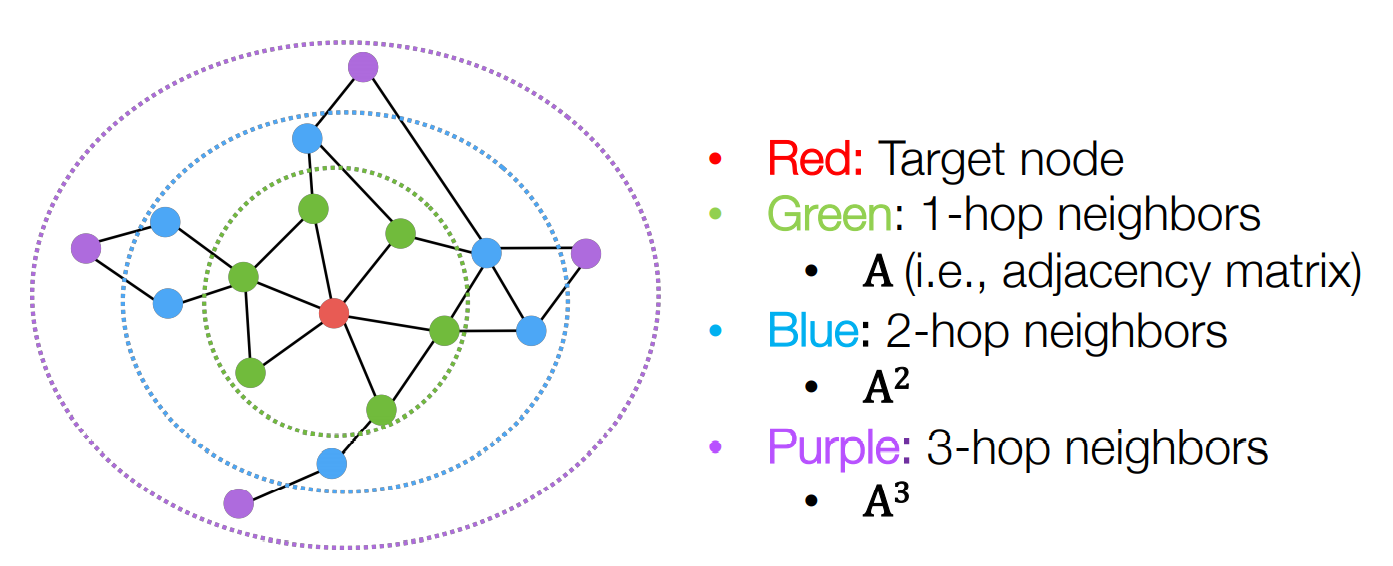

In [ ]:
k_hop_2

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.

In [ ]:
k_hop_1

array([[0., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
        1., 1., 0., 1.],
       [1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 1.,
        1., 0., 0., 0.],
       [1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
        0., 0., 0., 1.],
       [1., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1.,
        1., 0., 0., 1.],
       [0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
        0., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 1.,
        0., 0., 1., 1.],
       [0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0.,
        0., 1., 0., 0.],
       [1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0.,
        0., 0., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 0., 0., 1.,
        1., 1., 1., 0.],
       [1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0.,
        0., 1., 1., 1.],
       [1., 0., 1., 0., 1., 1.